<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 2</center></h2>
<h3><center>Task # 1</center></h3>

In [3]:
# Include libraries which may use in implementation
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Create a Neural_Network class
class Neural_Network(object):    
    def __init__(self,inputSize = 2,outputSize = 1 ):        
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize    
        #weights
        self.W1 = ? # randomly initialize W1 using random function of numpy
        # size of the wieght will be (inputSize +1, outputSize) that +1 is for bias    

    def feedforward(self, X):
        #forward propagation through our network
        # dot product of X (input) and set of weights
        # apply activation function (i.e. sigmoid)    
    return ? # return your answer with as a final output of the network

    def sigmoid(self, s):
        # activation function
        return ? # apply sigmoid function on s and return it's value

    def sigmoid_derivative(self, s):
        #derivative of sigmoid
        return ? # apply derivative of sigmoid on s and return it's value 

    def backwardpropagate(self,X, Y, y_pred, lr):
        # backward propagate through the network
        # compute error in output which is loss compute cross entropy loss function
        # applying derivative of sigmoid to the error
        # adjust set of weights
    
    def crossentropy(self, Y, Y_pred):
        # compute error based on crossentropy loss 
        return ? #error

    def train(self, trainX, trainY,epochs = 100, learningRate = 0.001, plot_err = True ,validationX = Null, validationY = Null):
        # feed forward trainX and trainY and recivce predicted value
        # backpropagation with trainX, trainY, predicted value and learning rate.
        # if validationX and validationY are not null than show validation accuracy and error of the model.
        # plot error of the model if plot_err is true

    def predict(self, testX):
        # predict the value of testX
    
    def accuracy(self, testX, testY):
        # predict the value of trainX
        # compare it with testY
        # compute accuracy, print it and show in the form of picture
        return ? # return accuracy    
        
    def saveModel(self,name):
        # save your trained model, it is your interpretation how, which and what data you store
        # which you will use later for prediction

        
    def loadModel(self,name):
        # load your trained model, load exactly how you stored it.

    


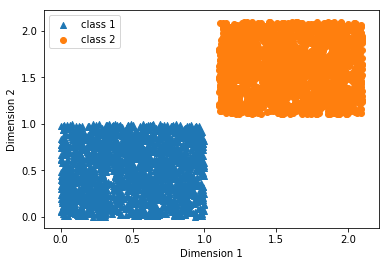

In [7]:
# generating dataset point
np.random.seed(1)
no_of_samples = 2000
dims = 2
#Generating random points of values between 0 to 1
class1=np.random.rand(no_of_samples,dims)
#To add separability we will add a bias of 1.1
class2=np.random.rand(no_of_samples,dims)+1.1
class_1_label=np.array([1 for n in range(no_of_samples)])
class_2_label=np.array([0 for n in range(no_of_samples)])
#Lets visualize the dataset
plt.scatter(class1[:,0],class1[:,1], marker='^', label="class 1")
plt.scatter(class2[:,0],class2[:,1], marker='o', label="class 2")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.show()

In [5]:
# Data concatenation
data = np.concatenate((class1,class2),axis=0)
label = np.concatenate((class_1_label,class_2_label),axis=0)

#Note: shuffle this dataset before dividing it into three parts

# Distribute this data into three parts i.e. training, validation and testing
trainX = ?# training data point
trainY = ?# training lables

validX = ? # validation data point
validY = ?# validation lables

testX = ?# testing data point
testY = ?# testing lables




NameError: name 'trainX' is not defined

In [ ]:
model = Neural_Network(2,1)
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 150, learningRate = 0.001, validationX = validX, validationY = validY)

In [ ]:
#save the best model which you have trained, 
model.save('bestmodel.mdl')

#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

In [ ]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
mm.load('bestmodel.mdl')
# check accuracy of that model
mm.accuracy(testX,testY)


